# Solver and SLM Accuracy and Runtime Notebook

## Notebook setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
# from scipy.interpolate import CubicSpline
from scipy.interpolate import CubicSpline
from matplotlib.ticker import ScalarFormatter
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
# import json


import sys
sys.path.append("./src")
from TOV_class import TOVsolver
from SLM import SLM
import scripts as plot_scripts  # plotting functions
plot_scripts.setup_rc_params()

In [3]:
error_threshold = 1e-6
modes = None  # set to `None` to auto-select modes 

EOS_modes = [14, 6, 6, 10, 9]
# EOS_modes = [14] * 5

In [4]:
# eos_path = "../EOS_Data/"
eos_path = "./../EOS_files/QEOS/"

# check the accuracy and runtimes with the tabular EOSs (5 of them)
# files_to_check = ["BL_eos.table", 
#                   "FSUGarnetNStarEOSA.txt", 
#                   "sorted_Sly4.dat", 
#                   "DS_CMF_eos.table", 
#                   "apr_eos.table"]
files_to_check = ["EOS_Quarkyonia_0.28_300.00.txt",
                  "EOS_Quarkyonia_0.12_352.63.txt",
                  "EOS_Quarkyonia_0.17_373.68.txt",
                  "EOS_Quarkyonia_0.17_436.84.txt",
                  "EOS_Quarkyonia_0.21_500.00.txt"]

# eos_names = ["BL", "FSU Garnet", "SLy4", "DSCMF", "APR"]
eos_names = ["300.00, 0.28", "352.63, 0.12", "373.68, 0.17", "436.84, 0.17", "500.00, 0.21"]

In [5]:
sol_pts = 2500  # number of points used per iteration for non solve_ivp solvers
number_of_solves = 1  # make this more for checking the runtimes !

# these empty lists will get filled with their corresponding runtimes per solve (size = `number_of_solves * 5`)
HF_runtimes = {"exact": [],
               "RK4": [],
               "RK2": [],
               "euler": []}
SLM_runtimes = {"exact": [],
                "RK4": [],
                "RK2": [],
                "euler": []}

## Calculate Exact (Adaptive) Solver

This uses `solve_ivp`

In [6]:
# tol = 3e-14

# # store the solutions per EOS
# exact_HF_results = {}
# exact_SLM_results = {}
# for i in np.arange(number_of_solves):
#     for i, file in enumerate(files_to_check):
#         eos_name = eos_names[i]
#         file_path = f"{eos_path}{file}"
#         # if not os.path.isfile(file_path):
#         #     print(f"\n\nSkipping {eos_name}: {file_path} not found.")
#         #     continue
#         print(f"\n\nChecking {eos_name}: ", end="")
        
#         # some solve_ivp methods: "RK45", "RK23", "DOP853", "Radau", "BDF", "LSODA"
#         # "Radau" is particularly good for stick ODEs (like these). But RK45 should also be good too.
#         tov_exact = TOVsolver(file_path, tidal=True, solver="RK45", solve_ivp_kwargs={"method": "RK45", 
#                                                                                            "atol": tol, 
#                                                                                            "rtol": tol})
        
        
#         # time the HF solution
#         HF_start_time = time.time()
#         tov_exact.tov_routine(verbose=False, write_to_file=False)  # HF solution
#         HF_end_time = time.time()
#         HF_runtime = HF_end_time - HF_start_time
#         HF_runtimes["exact"].append(HF_runtime)
        
#         # store data
#         rad = tov_exact.total_radius
#         pres = tov_exact.total_pres_central
#         mass = tov_exact.total_mass
#         tidal = tov_exact.k2

#         X = np.asarray([np.log(rad), np.log(pres), np.log(mass), np.log(tidal)], dtype=np.float64)

#         linT = np.arange(len(pres))
#         dt = (linT[-1] - linT[0]) / len(linT)  # time step for SLM
#         print("dt:", dt)
#         # X_list = [np.log(r_orig), np.log(p_orig), np.log(m_orig)]
#         # if tidal is True:
#         #     X_list.append(np.log(tidal_def))
#         # X = np.asarray(X_list, dtype=np.float64)

#         SLM_start_time = time.time()
#         SLM_result = SLM(X, dt, error_threshold=error_threshold, modes=modes)
#         Phi, Omega, lambdaVals, b, X_SLM, sVal, rVal = SLM_result
#         SLM_end_time = time.time()
#         SLM_runtime = SLM_end_time - SLM_start_time
        
#         SLM_runtimes["exact"].append(SLM_runtime)

#         exact_HF_results[eos_name] = np.exp(X)
#         exact_SLM_results[eos_name] = np.exp(X_SLM)

#         print(f"HF solved in {HF_runtime:.4} seconds.")
#         print(f"SLM solved in {SLM_runtime:.4} seconds.")
#         print(f"speedup: {HF_runtime / SLM_runtime:.2}")


In [7]:
# fig, ax = plt.subplots(1, 3, dpi=200, figsize=(15, 5))

# ax[0].set_title("Visualizing Exact MR Curves")
# for eos in eos_names:
#     ax[0].scatter(exact_HF_results[eos][0], exact_HF_results[eos][2], 
#                 alpha=0.7, label=f"{eos} data")
#     ax[0].plot(exact_SLM_results[eos][0], exact_SLM_results[eos][2], 
#              alpha=0.7, linewidth=3, label=f"{eos} SLM")
# ax[0].legend()


# ax[1].set_title("Visualizing Exact PR Curves")
# for eos in eos_names:
#     ax[1].scatter(exact_HF_results[eos][0], exact_HF_results[eos][1], 
#                 alpha=0.7, label=f"{eos} data")
#     ax[1].plot(exact_SLM_results[eos][0], exact_SLM_results[eos][1], 
#              alpha=0.7, linewidth=3, label=f"{eos} SLM")
# ax[1].set_yscale("log")
# ax[1].legend()

# ax[2].set_title("Visualizing Exact k2R Curves")
# for eos in eos_names:
#     ax[2].scatter(exact_HF_results[eos][0], exact_HF_results[eos][3], 
#                 alpha=0.7, label=f"{eos} data")
#     ax[2].plot(exact_SLM_results[eos][0], exact_SLM_results[eos][3], 
#              alpha=0.7, linewidth=3, label=f"{eos} SLM")
# ax[2].legend()

# plt.show()

## Check RK4 solver

In [8]:
EOS_modes[1]

6

In [9]:
# store the solutions per EOS
RK4_HF_results = {}
RK4_SLM_results = {}
for i in np.arange(number_of_solves):
    for i, file in enumerate(files_to_check):
        eos_name = eos_names[i]
        print(f"\n\nChecking {eos_name}: ", end="")
        
        tov_RK4 = TOVsolver(f"{eos_path}{file}", tidal=True, solver="RK4", sol_pts=sol_pts)
        
        
        # time the HF solution
        HF_start_time = time.time()
        tov_RK4.tov_routine(verbose=False, write_to_file=False)  # HF solution
        HF_end_time = time.time()
        HF_runtime = HF_end_time - HF_start_time
        HF_runtimes["RK4"].append(HF_runtime)
        
        # store data
        rad = tov_RK4.total_radius
        pres = tov_RK4.total_pres_central
        mass = tov_RK4.total_mass
        tidal = tov_RK4.k2


        X = np.array([np.log(rad), np.log(pres), np.log(mass), np.log(tidal)], dtype=np.float64)
        nan_indices = np.argwhere(np.isnan(X))
        if nan_indices.shape[0] > 0:
            nan_indices = nan_indices[:, 1]
            print("Filtered indices: ", end="")
            print(nan_indices)
            # this is a super slow way to do this
            filtered_data = np.zeros((X.shape[0], 
                                     X.shape[1] - len(nan_indices)), 
                                     dtype=np.float64)
            qq = 0
            for j in np.arange(X.shape[1]):
                if j not in nan_indices:
                    filtered_data[:, qq] = X[:, j]
                    qq += 1
        else:
            filtered_data = X
        
        linT = np.arange(len(pres))
        dt = (linT[-1] - linT[0]) / len(linT)
        
        SLM_start_time = time.time()
        SLM_result = SLM(filtered_data, dt, error_threshold=error_threshold, 
                         modes=EOS_modes[i])
        Phi, Omega, lambdaVals, b, X_SLM, sVal, rVal = SLM_result
        SLM_end_time = time.time()
        SLM_runtime = SLM_end_time - SLM_start_time
        
        SLM_runtimes["RK4"].append(SLM_runtime)

        RK4_HF_results[eos_name] = np.exp(X)
        RK4_SLM_results[eos_name] = np.exp(X_SLM)

        print(f"HF solved in {HF_runtime:.4} seconds.")
        print(f"SLM solved in {SLM_runtime:.4} seconds.")
        print(f"speedup: {HF_runtime / SLM_runtime:.2}")
#




Checking 300.00, 0.28: Woo it worked!
Max mass:  2.872214 Radius:  14.481943 Central pressure:  235.251972
HF solved in 11.35 seconds.
SLM solved in 0.000515 seconds.
speedup: 2.2e+04


Checking 352.63, 0.12: Woo it worked!


/Users/joshuamaldonado/Documents/GitHub/SLM/src/TOV_class.py:299: RuntimeWarning: overflow encountered in scalar power
  dydx = -(1.0 / x) * (y**2.0 + f * y + q)
/Users/joshuamaldonado/Documents/GitHub/SLM/src/TOV_class.py:299: RuntimeWarning: invalid value encountered in scalar add
  dydx = -(1.0 / x) * (y**2.0 + f * y + q)


Max mass:  2.665613 Radius:  12.60574 Central pressure:  393.310659
Filtered indices: [44]
HF solved in 11.2 seconds.
SLM solved in 0.0003622 seconds.
speedup: 3.1e+04


Checking 373.68, 0.17: Woo it worked!
Max mass:  2.536794 Radius:  11.908865 Central pressure:  483.24001
Filtered indices: [44]
HF solved in 11.3 seconds.
SLM solved in 0.000349 seconds.
speedup: 3.2e+04


Checking 436.84, 0.17: Woo it worked!
Max mass:  2.325425 Radius:  10.649128 Central pressure:  818.547763
HF solved in 11.2 seconds.
SLM solved in 0.0004001 seconds.
speedup: 2.8e+04


Checking 500.00, 0.21: Woo it worked!
Max mass:  2.225525 Radius:  10.180078 Central pressure:  1013.27043
HF solved in 11.01 seconds.
SLM solved in 0.0004113 seconds.
speedup: 2.7e+04


/Users/joshuamaldonado/Documents/GitHub/SLM/venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/joshuamaldonado/Documents/GitHub/SLM/venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


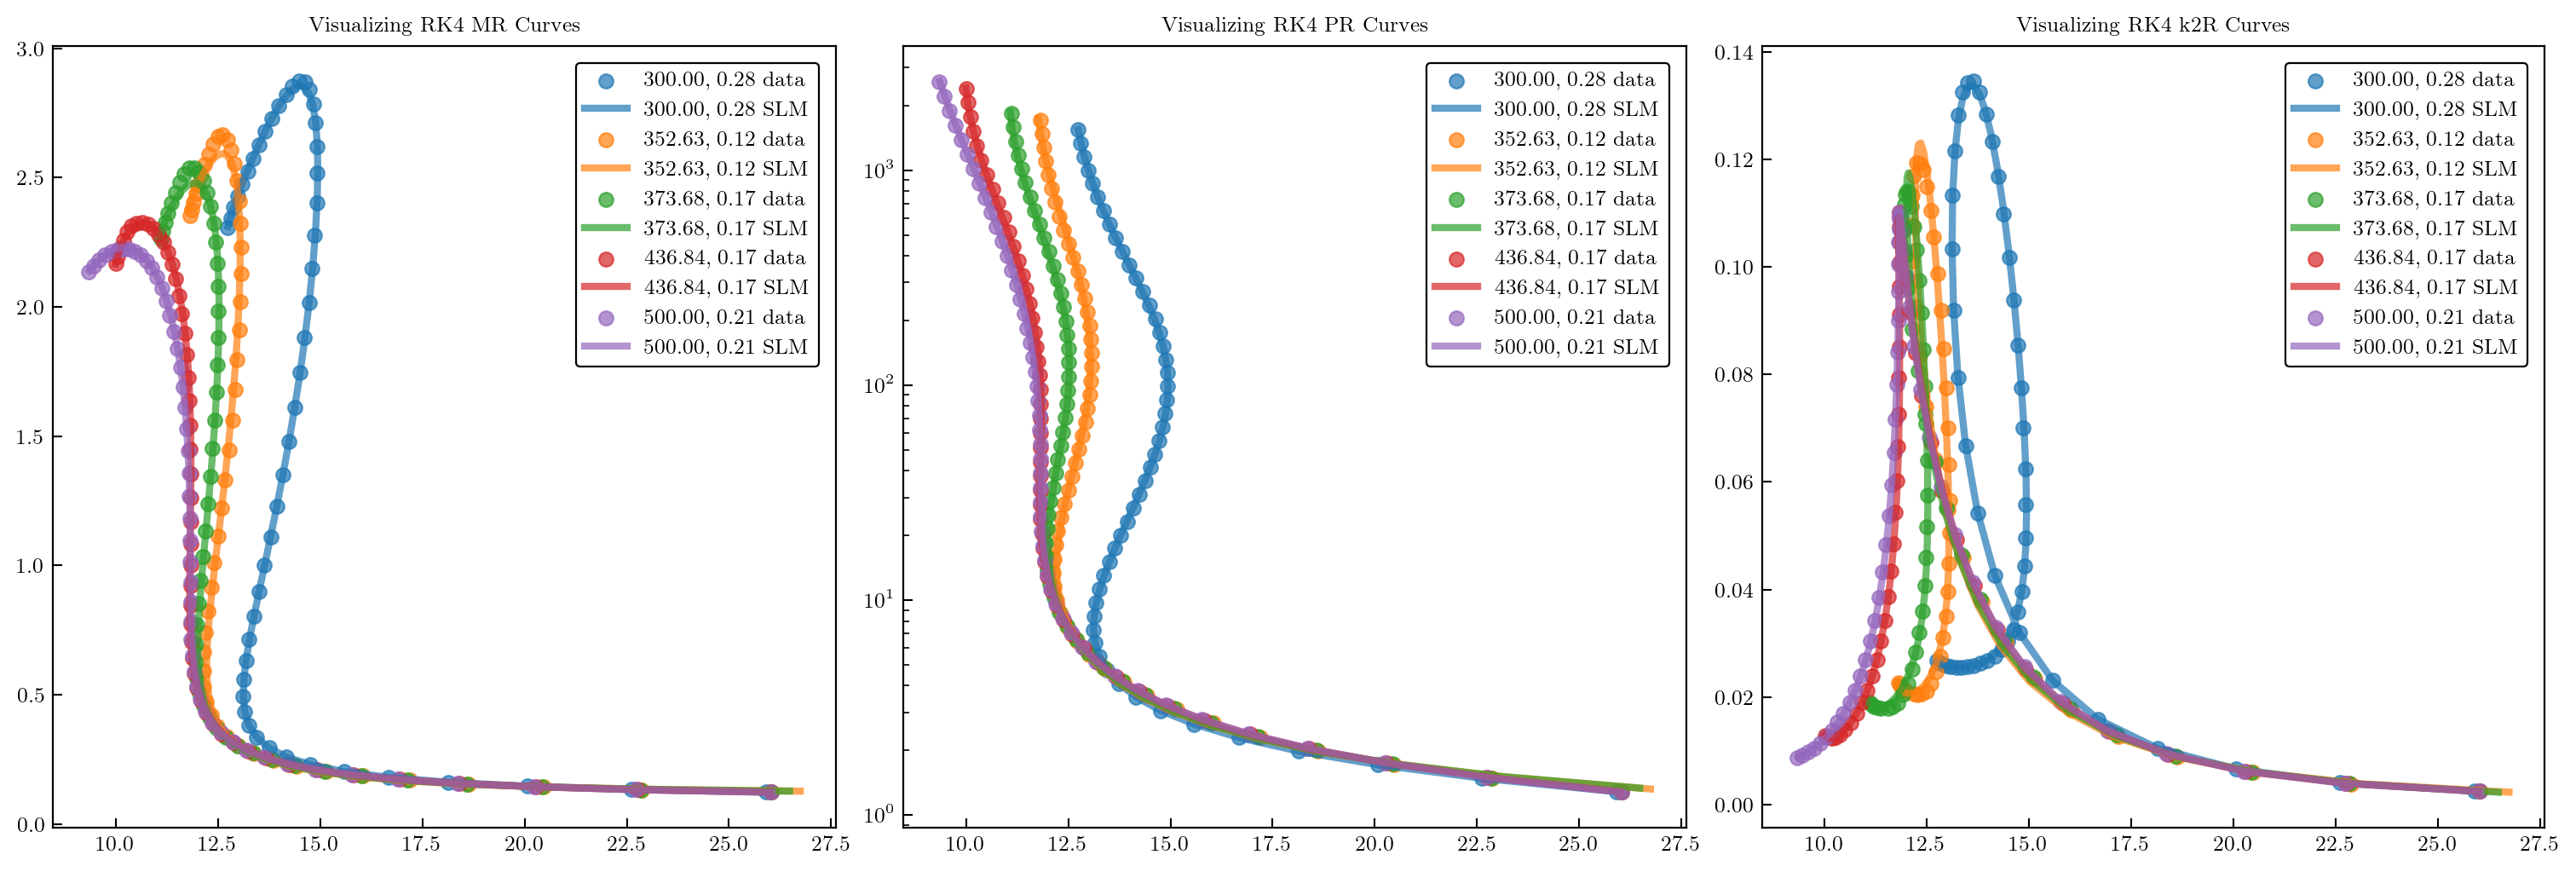

In [10]:
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(15, 5))

ax[0].set_title("Visualizing RK4 MR Curves")
for eos in eos_names:
    ax[0].scatter(RK4_HF_results[eos][0], RK4_HF_results[eos][2], 
                alpha=0.7, label=f"{eos} data")
    ax[0].plot(RK4_SLM_results[eos][0], RK4_SLM_results[eos][2], 
             alpha=0.7, linewidth=3, label=f"{eos} SLM")
ax[0].legend()


ax[1].set_title("Visualizing RK4 PR Curves")
for eos in eos_names:
    ax[1].scatter(RK4_HF_results[eos][0], RK4_HF_results[eos][1], 
                alpha=0.7, label=f"{eos} data")
    ax[1].plot(RK4_SLM_results[eos][0], RK4_SLM_results[eos][1], 
             alpha=0.7, linewidth=3, label=f"{eos} SLM")
ax[1].set_yscale("log")
ax[1].legend()

ax[2].set_title("Visualizing RK4 k2R Curves")
for eos in eos_names:
    ax[2].scatter(RK4_HF_results[eos][0], RK4_HF_results[eos][3], 
                alpha=0.7, label=f"{eos} data")
    ax[2].plot(RK4_SLM_results[eos][0], RK4_SLM_results[eos][3], 
             alpha=0.7, linewidth=3, label=f"{eos} SLM")
ax[2].legend()

plt.show()

## Check RK2 Solver

In [11]:
# store the solutions per EOS
RK2_HF_results = {}
RK2_SLM_results = {}
for i in np.arange(number_of_solves):
    for i, file in enumerate(files_to_check):
        eos_name = eos_names[i]
        print(f"\n\nChecking {eos_name}: ", end="")
        
        tov_RK2 = TOVsolver(f"{eos_path}{file}", tidal=True, solver="RK2", sol_pts=sol_pts)
        
        
        # time the HF solution
        HF_start_time = time.time()
        tov_RK2.tov_routine(verbose=False, write_to_file=False)  # HF solution
        HF_end_time = time.time()
        HF_runtime = HF_end_time - HF_start_time
        HF_runtimes["RK2"].append(HF_runtime)
        
        # store data
        rad = tov_RK2.total_radius
        pres = tov_RK2.total_pres_central
        mass = tov_RK2.total_mass
        tidal = tov_RK2.k2

        X = np.array([np.log(rad), np.log(pres), np.log(mass), np.log(tidal)], dtype=np.float64)
        nan_indices = np.argwhere(np.isnan(X))
        if nan_indices.shape[0] > 0:
            nan_indices = nan_indices[:, 1]
            print("Filtered indices: ", end="")
            print(nan_indices)
            # this is a super slow way to do this
            filtered_data = np.zeros((X.shape[0], 
                                     X.shape[1] - len(nan_indices)), 
                                     dtype=np.float64)
            qq = 0
            for j in np.arange(X.shape[1]):
                if j not in nan_indices:
                    filtered_data[:, qq] = X[:, j]
                    qq += 1
        else:
            filtered_data = X
        
        linT = np.arange(len(pres))
        dt = (linT[-1] - linT[0]) / len(linT)
        
        SLM_start_time = time.time()
        SLM_result = SLM(filtered_data, dt, error_threshold=error_threshold, 
                         modes=EOS_modes[i])
        Phi, Omega, lambdaVals, b, X_SLM, sVal, rVal = SLM_result
        SLM_end_time = time.time()
        SLM_runtime = SLM_end_time - SLM_start_time
        SLM_runtimes["RK2"].append(SLM_runtime)

        RK2_HF_results[eos_name] = np.exp(X)
        RK2_SLM_results[eos_name] = np.exp(X_SLM)

        print(f"HF solved in {HF_runtime:.4} seconds.")
        print(f"SLM solved in {SLM_runtime:.4} seconds.")
        print(f"speedup: {HF_runtime / SLM_runtime:.2}")
#




Checking 300.00, 0.28: Woo it worked!
Max mass:  2.872218 Radius:  14.508746 Central pressure:  235.251972
HF solved in 5.521 seconds.
SLM solved in 0.0005121 seconds.
speedup: 1.1e+04


Checking 352.63, 0.12: Woo it worked!


/Users/joshuamaldonado/Documents/GitHub/SLM/src/TOV_class.py:299: RuntimeWarning: overflow encountered in scalar power
  dydx = -(1.0 / x) * (y**2.0 + f * y + q)
/Users/joshuamaldonado/Documents/GitHub/SLM/src/TOV_class.py:299: RuntimeWarning: invalid value encountered in scalar add
  dydx = -(1.0 / x) * (y**2.0 + f * y + q)


Max mass:  2.665621 Radius:  12.645944 Central pressure:  393.310659
Filtered indices: [43 44]
HF solved in 5.49 seconds.
SLM solved in 0.000351 seconds.
speedup: 1.6e+04


Checking 373.68, 0.17: Woo it worked!
Max mass:  2.536803 Radius:  11.949069 Central pressure:  483.24001
Filtered indices: [43]
HF solved in 5.45 seconds.
SLM solved in 0.0003588 seconds.
speedup: 1.5e+04


Checking 436.84, 0.17: Woo it worked!
Max mass:  2.325435 Radius:  10.689333 Central pressure:  818.547763
HF solved in 5.548 seconds.
SLM solved in 0.0003641 seconds.
speedup: 1.5e+04


Checking 500.00, 0.21: Woo it worked!
Max mass:  2.225535 Radius:  10.206881 Central pressure:  1013.27043
HF solved in 5.44 seconds.
SLM solved in 0.0004032 seconds.
speedup: 1.3e+04


/Users/joshuamaldonado/Documents/GitHub/SLM/venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/joshuamaldonado/Documents/GitHub/SLM/venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


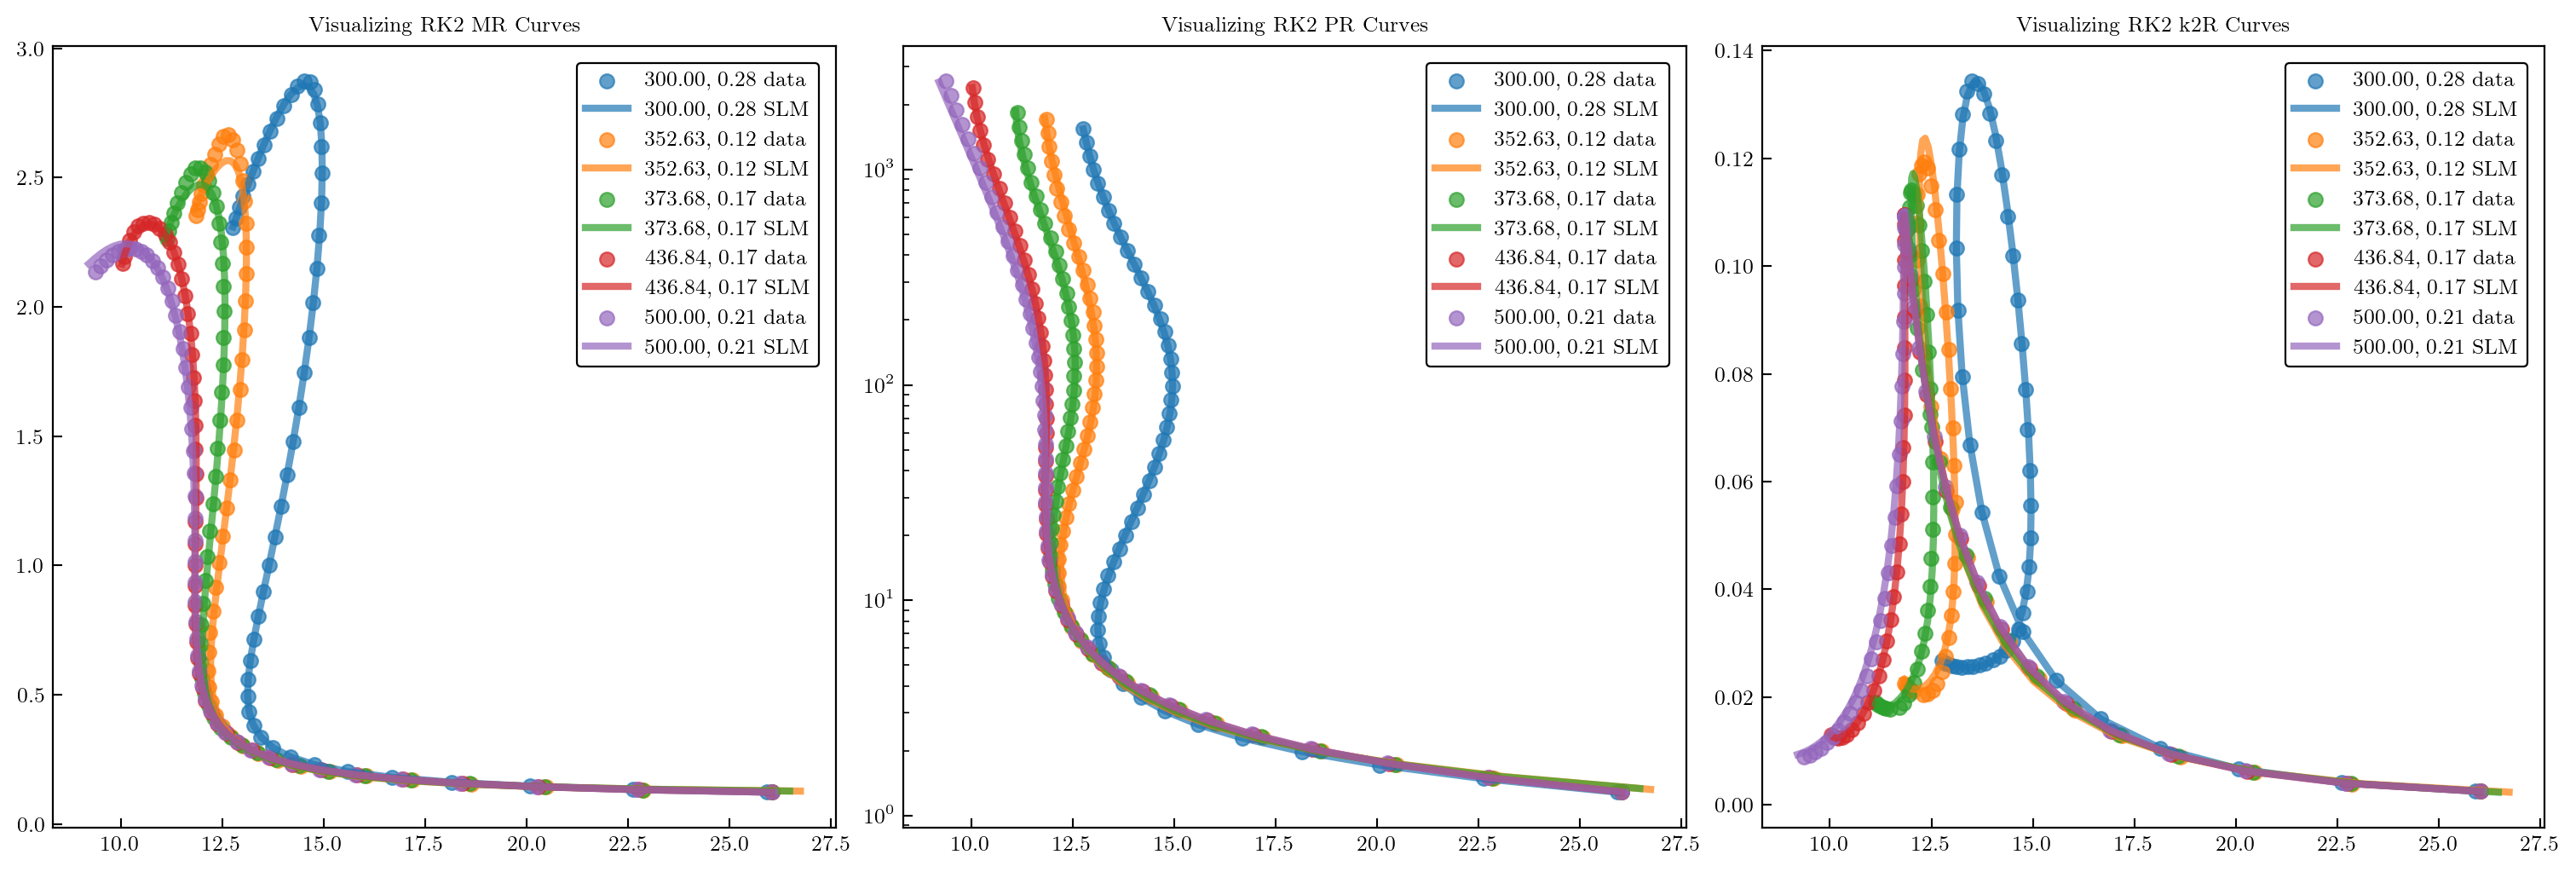

In [12]:
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(15, 5))

ax[0].set_title("Visualizing RK2 MR Curves")
for eos in eos_names:
    ax[0].scatter(RK2_HF_results[eos][0], RK2_HF_results[eos][2], 
                alpha=0.7, label=f"{eos} data")
    ax[0].plot(RK2_SLM_results[eos][0], RK2_SLM_results[eos][2], 
             alpha=0.7, linewidth=3, label=f"{eos} SLM")
ax[0].legend()


ax[1].set_title("Visualizing RK2 PR Curves")
for eos in eos_names:
    ax[1].scatter(RK2_HF_results[eos][0], RK2_HF_results[eos][1], 
                alpha=0.7, label=f"{eos} data")
    ax[1].plot(RK2_SLM_results[eos][0], RK2_SLM_results[eos][1], 
             alpha=0.7, linewidth=3, label=f"{eos} SLM")
ax[1].set_yscale("log")
ax[1].legend()

ax[2].set_title("Visualizing RK2 k2R Curves")
for eos in eos_names:
    ax[2].scatter(RK2_HF_results[eos][0], RK2_HF_results[eos][3], 
                alpha=0.7, label=f"{eos} data")
    ax[2].plot(RK2_SLM_results[eos][0], RK2_SLM_results[eos][3], 
             alpha=0.7, linewidth=3, label=f"{eos} SLM")
ax[2].legend()

plt.show()

# Check Euler Solver

In [13]:
# store the solutions per EOS
euler_HF_results = {}
euler_SLM_results = {}
for i in np.arange(number_of_solves):
    for i, file in enumerate(files_to_check):
        eos_name = eos_names[i]
        print(f"\n\nChecking {eos_name}: ", end="")
        
        tov_euler = TOVsolver(f"{eos_path}{file}", tidal=True, solver="euler", sol_pts=sol_pts)
        
        
        # time the HF solution
        HF_start_time = time.time()
        tov_euler.tov_routine(verbose=False, write_to_file=False)  # HF solution
        HF_end_time = time.time()
        HF_runtime = HF_end_time - HF_start_time
        HF_runtimes["euler"].append(HF_runtime)
        
        # store data
        rad = tov_euler.total_radius
        pres = tov_euler.total_pres_central
        mass = tov_euler.total_mass
        tidal = tov_euler.k2

        X = np.array([np.log(rad), np.log(pres), np.log(mass), np.log(tidal)], dtype=np.float64)
        nan_indices = np.argwhere(np.isnan(X))
        if nan_indices.shape[0] > 0:
            nan_indices = nan_indices[:, 1]
            print("Filtered indices: ", end="")
            print(nan_indices)
            # this is a super slow way to do this
            filtered_data = np.zeros((X.shape[0], 
                                     X.shape[1] - len(nan_indices)), 
                                     dtype=np.float64)
            qq = 0
            for j in np.arange(X.shape[1]):
                if j not in nan_indices:
                    filtered_data[:, qq] = X[:, j]
                    qq += 1
        else:
            filtered_data = X
        
        linT = np.arange(len(pres))
        dt = (linT[-1] - linT[0]) / len(linT)
        
        SLM_start_time = time.time()
        SLM_result = SLM(filtered_data, dt, error_threshold=error_threshold, 
                         modes=EOS_modes[i])
        Phi, Omega, lambdaVals, b, X_SLM, sVal, rVal = SLM_result
        SLM_end_time = time.time()
        SLM_runtime = SLM_end_time - SLM_start_time
        
        SLM_runtimes["euler"].append(SLM_runtime)
        
        euler_HF_results[eos_name] = np.exp(X)
        euler_SLM_results[eos_name] = np.exp(X_SLM)

        print(f"HF solved in {HF_runtime:.4} seconds.")
        print(f"SLM solved in {SLM_runtime:.4} seconds.")
        print(f"speedup: {HF_runtime / SLM_runtime:.2}")
#




Checking 300.00, 0.28: Woo it worked!
Max mass:  2.872701 Radius:  14.374731 Central pressure:  235.251972
HF solved in 2.732 seconds.
SLM solved in 0.0004668 seconds.
speedup: 5.9e+03


Checking 352.63, 0.12: Woo it worked!
Max mass:  2.666127 Radius:  12.51193 Central pressure:  393.310659
Filtered indices: [43 48]
HF solved in 2.733 seconds.
SLM solved in 0.00037 seconds.
speedup: 7.4e+03


Checking 373.68, 0.17: Woo it worked!
Max mass:  2.537068 Radius:  11.801653 Central pressure:  483.24001
Filtered indices: [45]
HF solved in 2.944 seconds.
SLM solved in 0.0003867 seconds.
speedup: 7.6e+03


Checking 436.84, 0.17: Woo it worked!
Max mass:  2.324904 Radius:  10.541917 Central pressure:  818.547763
HF solved in 2.789 seconds.
SLM solved in 0.0005939 seconds.
speedup: 4.7e+03


Checking 500.00, 0.21: Woo it worked!
Max mass:  2.224589 Radius:  10.072866 Central pressure:  1013.27043
HF solved in 2.912 seconds.
SLM solved in 0.0004179 seconds.
speedup: 7e+03


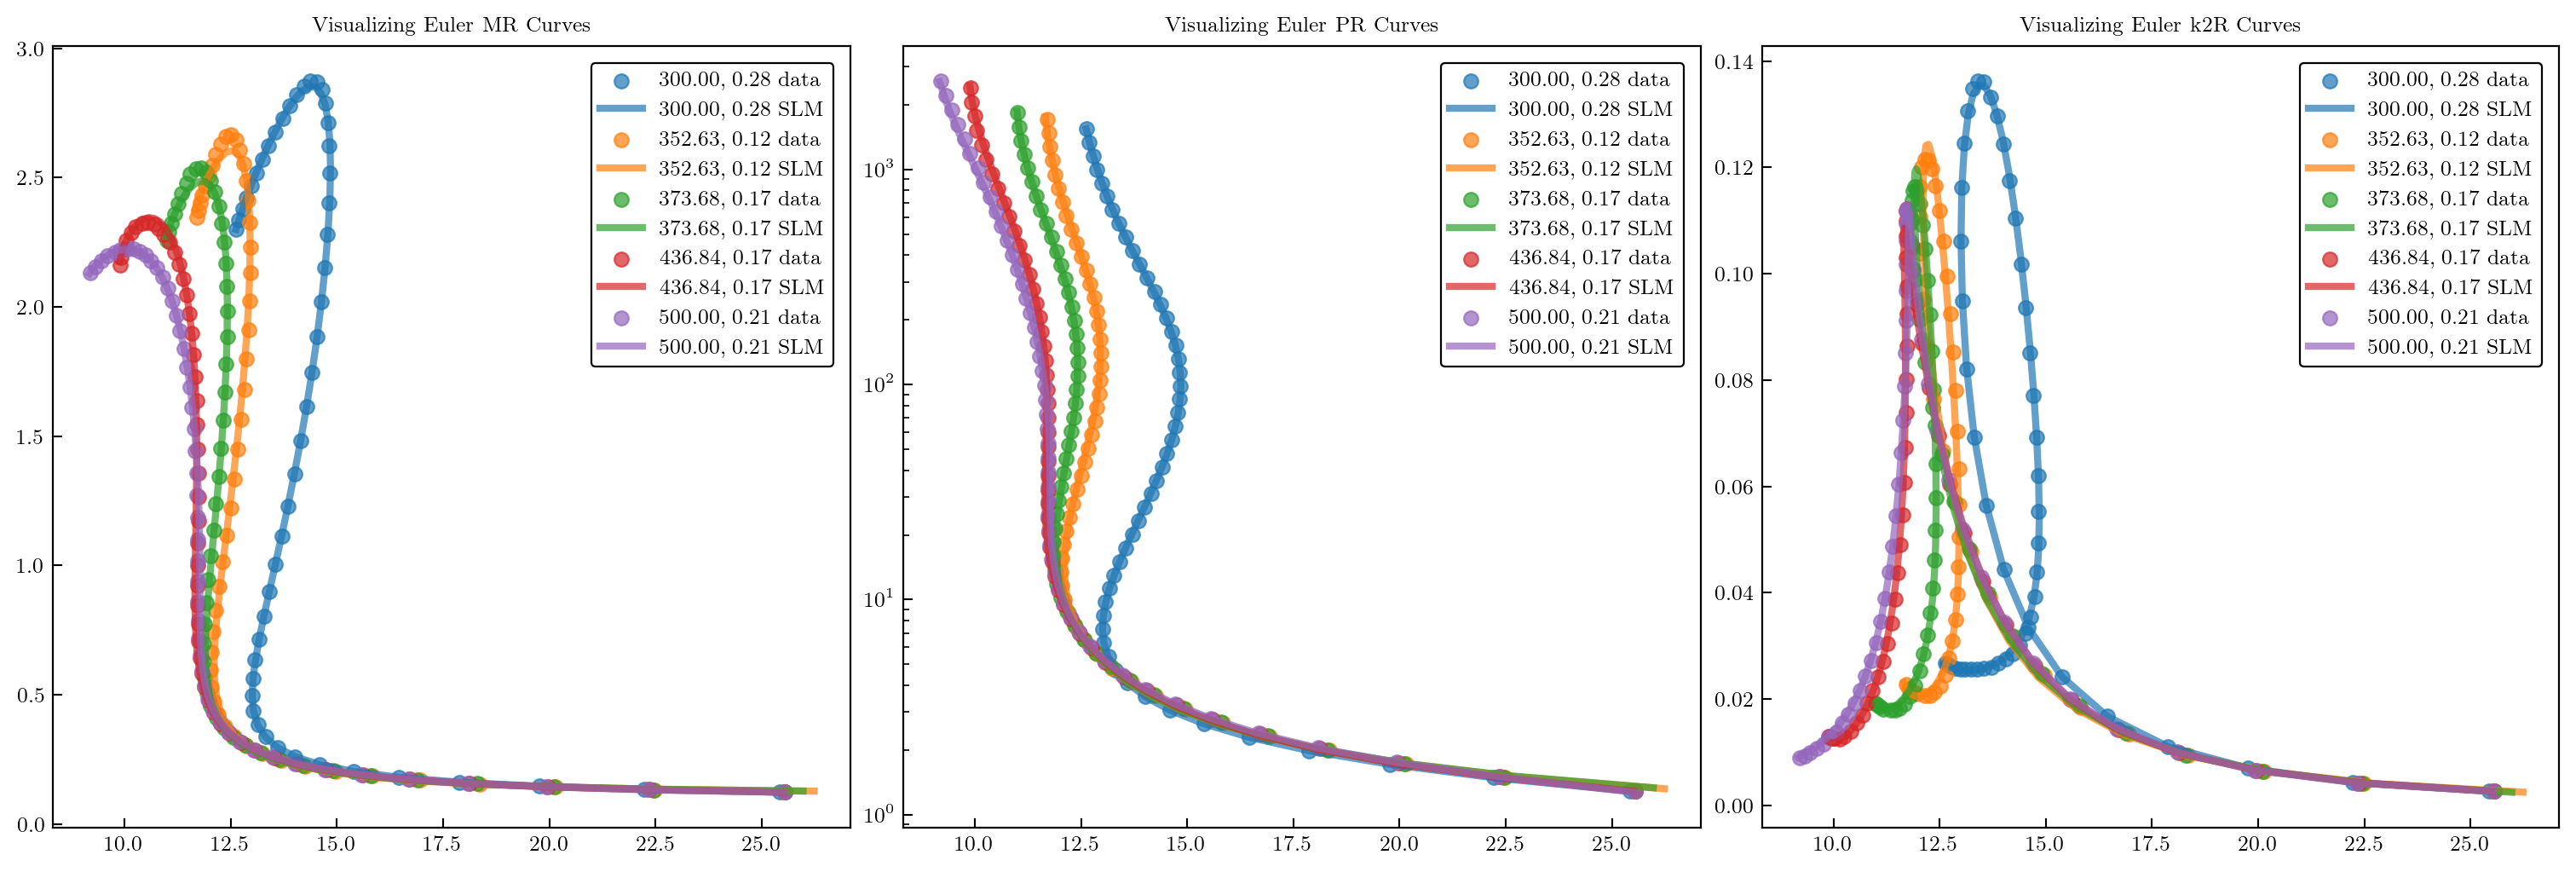

In [14]:
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(15, 5))

ax[0].set_title("Visualizing Euler MR Curves")
for eos in eos_names:
    ax[0].scatter(euler_HF_results[eos][0], euler_HF_results[eos][2], 
                alpha=0.7, label=f"{eos} data")
    ax[0].plot(euler_SLM_results[eos][0], euler_SLM_results[eos][2], 
             alpha=0.7, linewidth=3, label=f"{eos} SLM")
ax[0].legend()


ax[1].set_title("Visualizing Euler PR Curves")
for eos in eos_names:
    ax[1].scatter(euler_HF_results[eos][0], euler_HF_results[eos][1], 
                alpha=0.7, label=f"{eos} data")
    ax[1].plot(euler_SLM_results[eos][0], euler_SLM_results[eos][1], 
             alpha=0.7, linewidth=3, label=f"{eos} SLM")
ax[1].set_yscale("log")
ax[1].legend()

ax[2].set_title("Visualizing Euler k2R Curves")
for eos in eos_names:
    ax[2].scatter(euler_HF_results[eos][0], euler_HF_results[eos][3], 
                alpha=0.7, label=f"{eos} data")
    ax[2].plot(euler_SLM_results[eos][0], euler_SLM_results[eos][3], 
             alpha=0.7, linewidth=3, label=f"{eos} SLM")
ax[2].legend()

plt.show()

## Nice! Now look at errors

I'm not totally sure the best way to go about this. So I'll look at where the peak is on the MR curve since that's how we did the errors on the table originally.

In [15]:
def the_good_interpolator(x_tov, y_tov, x_dmd):
    # Create a normalized parameter t that corresponds to the original x values
    t_original = np.linspace(0, 1, num=len(x_tov))
    
    # Create cubic splines for original x and y
    cs_x = CubicSpline(t_original, x_tov, bc_type='natural')
    cs_y = CubicSpline(t_original, y_tov, bc_type='natural')
    
    # Create a new parameter t for the new x-values
    t_new = np.linspace(0, 1, num=len(x_dmd))
    
    # Interpolate to find the corresponding y-values for the new x-values
    y_new = cs_y(t_new)
    
    return x_dmd, y_new

def percent_error(HF, SLM):
    try:
        error = 100 * np.abs(HF - SLM) / HF
    except:
        error = np.nan
    return error

In [16]:
HF_runtimes

{'exact': [],
 'RK4': [11.353435039520264,
  11.201850175857544,
  11.296623229980469,
  11.201621055603027,
  11.014554977416992],
 'RK2': [5.521418809890747,
  5.490498065948486,
  5.449552059173584,
  5.548258066177368,
  5.4398839473724365],
 'euler': [2.732163906097412,
  2.733428955078125,
  2.9441170692443848,
  2.788651943206787,
  2.9116721153259277]}

In [19]:
errors = {}  # for storing all errors
exact_HF = []  # for comparing HF solvers to the exact results

rad_HF = {}
mass_HF = {}
rad_SLM = {}
mass_SLM = {}

solvers = ["RK4", "RK2", "euler"]
for solver in solvers:
    for i, eos in enumerate(files_to_check):
        eos_name = eos_names[i]
        HF = eval(f"{solver}_HF_results[\"{eos_name}\"]")
        SLM_data = eval(f"{solver}_SLM_results[\"{eos_name}\"]")
        
        # select max point on MR curve
        # for HF
        HF_max_index = np.where(HF[2] == np.max(HF[2]))[0][0]  # grab index the maximum mass
        HF_max_rad = HF[0][HF_max_index]
        HF_max_mass = HF[2][HF_max_index]
        rad_HF[f"{eos_name} {solver}"] = HF_max_rad
        mass_HF[f"{eos_name} {solver}"] = HF_max_mass
        # for SLM
        SLM_max_index = np.where(SLM_data[2] == np.max(SLM_data[2]))[0][0]  # grab index the maximum mass
        SLM_max_rad = SLM_data[0][SLM_max_index].real
        SLM_max_mass = SLM_data[2][SLM_max_index].real
        rad_SLM[f"{eos_name} {solver}"] = SLM_max_rad
        mass_SLM[f"{eos_name} {solver}"] = SLM_max_mass
        
        # store the exact results for comparing to the other solvers
        # if (solver == "exact"):
        #     exact_HF.append([HF_max_rad, HF_max_mass])
        # else:
        #     errors[f"{eos_name} {solver} HF rad"] = percent_error(exact_HF[i][0], HF_max_rad)
        #     errors[f"{eos_name} {solver} HF mass"] = percent_error(exact_HF[i][1], HF_max_mass)
        
        # compare SLM to it's corresponding HF solver
        errors[f"{eos_name} {solver} SLM rad"] = percent_error(HF_max_rad, SLM_max_rad)
        errors[f"{eos_name} {solver} SLM mass"] = percent_error(HF_max_mass, SLM_max_mass)


# print results
for i, eos in enumerate(files_to_check):
    eos_name = eos_names[i]
    print(f"{eos_name} EOS:                 <----")
    for solver in solvers:
        if solver == "RK4":
            print("!!!")
        if (solver != "exact"):
            print(f"{solver} HF result: ")
            print(f"      mass = {np.round(mass_HF[f"{eos_name} {solver}"], 3)}")
            print(f"    radius = {np.round(rad_HF[f"{eos_name} {solver}"], 3)}")
            print(f"{solver} SLM result: ")
            print(f"      mass = {np.round(mass_SLM[f"{eos_name} {solver}"], 3)}")
            print(f"    radius = {np.round(rad_SLM[f"{eos_name} {solver}"], 3)}")
            
            # print(f"{solver} HF  error:")
            # print(f"    mass={np.round(errors[f"{eos_name} {solver} HF mass"], 2)}")
            # print(f"    rad={np.round(errors[f"{eos_name} {solver} HF rad"], 2)}")
            print(f"{solver} SLM error:")
            print(f"    mass={np.round(errors[f"{eos_name} {solver} SLM mass"], 2)}")
            print(f"    rad={np.round(errors[f"{eos_name} {solver} SLM rad"], 2)}")
        else:
            print(f"{solver} SLM error:")
            print(f"    mass = {np.round(errors[f"{eos_name} {solver} SLM mass"], 2)}")
            print(f"    rad = {np.round(errors[f"{eos_name} {solver} SLM rad"], 2)}")
        
        print(f"HF runtime = {np.round(HF_runtimes[solver][i], 3)}s")
        print(f"SLM runtime = {np.round(1e4 * SLM_runtimes[solver][i], 3)} x 1e4s")
        print("")
    print("")


300.00, 0.28 EOS:                 <----
!!!
RK4 HF result: 
      mass = 2.872
    radius = 14.482
RK4 SLM result: 
      mass = 2.854
    radius = 14.466
RK4 SLM error:
    mass=0.62
    rad=0.11
HF runtime = 11.353s
SLM runtime = 5.15 x 1e4s

RK2 HF result: 
      mass = 2.872
    radius = 14.509
RK2 SLM result: 
      mass = 2.857
    radius = 14.495
RK2 SLM error:
    mass=0.54
    rad=0.1
HF runtime = 5.521s
SLM runtime = 5.121 x 1e4s

euler HF result: 
      mass = 2.873
    radius = 14.375
euler SLM result: 
      mass = 2.852
    radius = 14.363
euler SLM error:
    mass=0.71
    rad=0.08
HF runtime = 2.732s
SLM runtime = 4.668 x 1e4s


352.63, 0.12 EOS:                 <----
!!!
RK4 HF result: 
      mass = 2.666
    radius = 12.606
RK4 SLM result: 
      mass = 2.593
    radius = 12.615
RK4 SLM error:
    mass=2.74
    rad=0.07
HF runtime = 11.202s
SLM runtime = 3.622 x 1e4s

RK2 HF result: 
      mass = 2.666
    radius = 12.646
RK2 SLM result: 
      mass = 2.565
    radius

In [29]:
print(f"{11 / (3e-4):.3e}")
print(f"{11 / (5e-4):.3e}")
print(f"{11 / (2e-4):.3e}")
print(f"{11 / (1e-4):.3e}")

3.667e+04
2.200e+04
5.500e+04
1.100e+05


## Cat Plot !


```
 _._     _,-'""`-._        
(,-.`._,'(       |\`-/|    
    `-.-' \ )-`( , o o)    
          `-    \`_`"'-    
```

KeyError: '300.00, 0.28 RK4 HF mass'

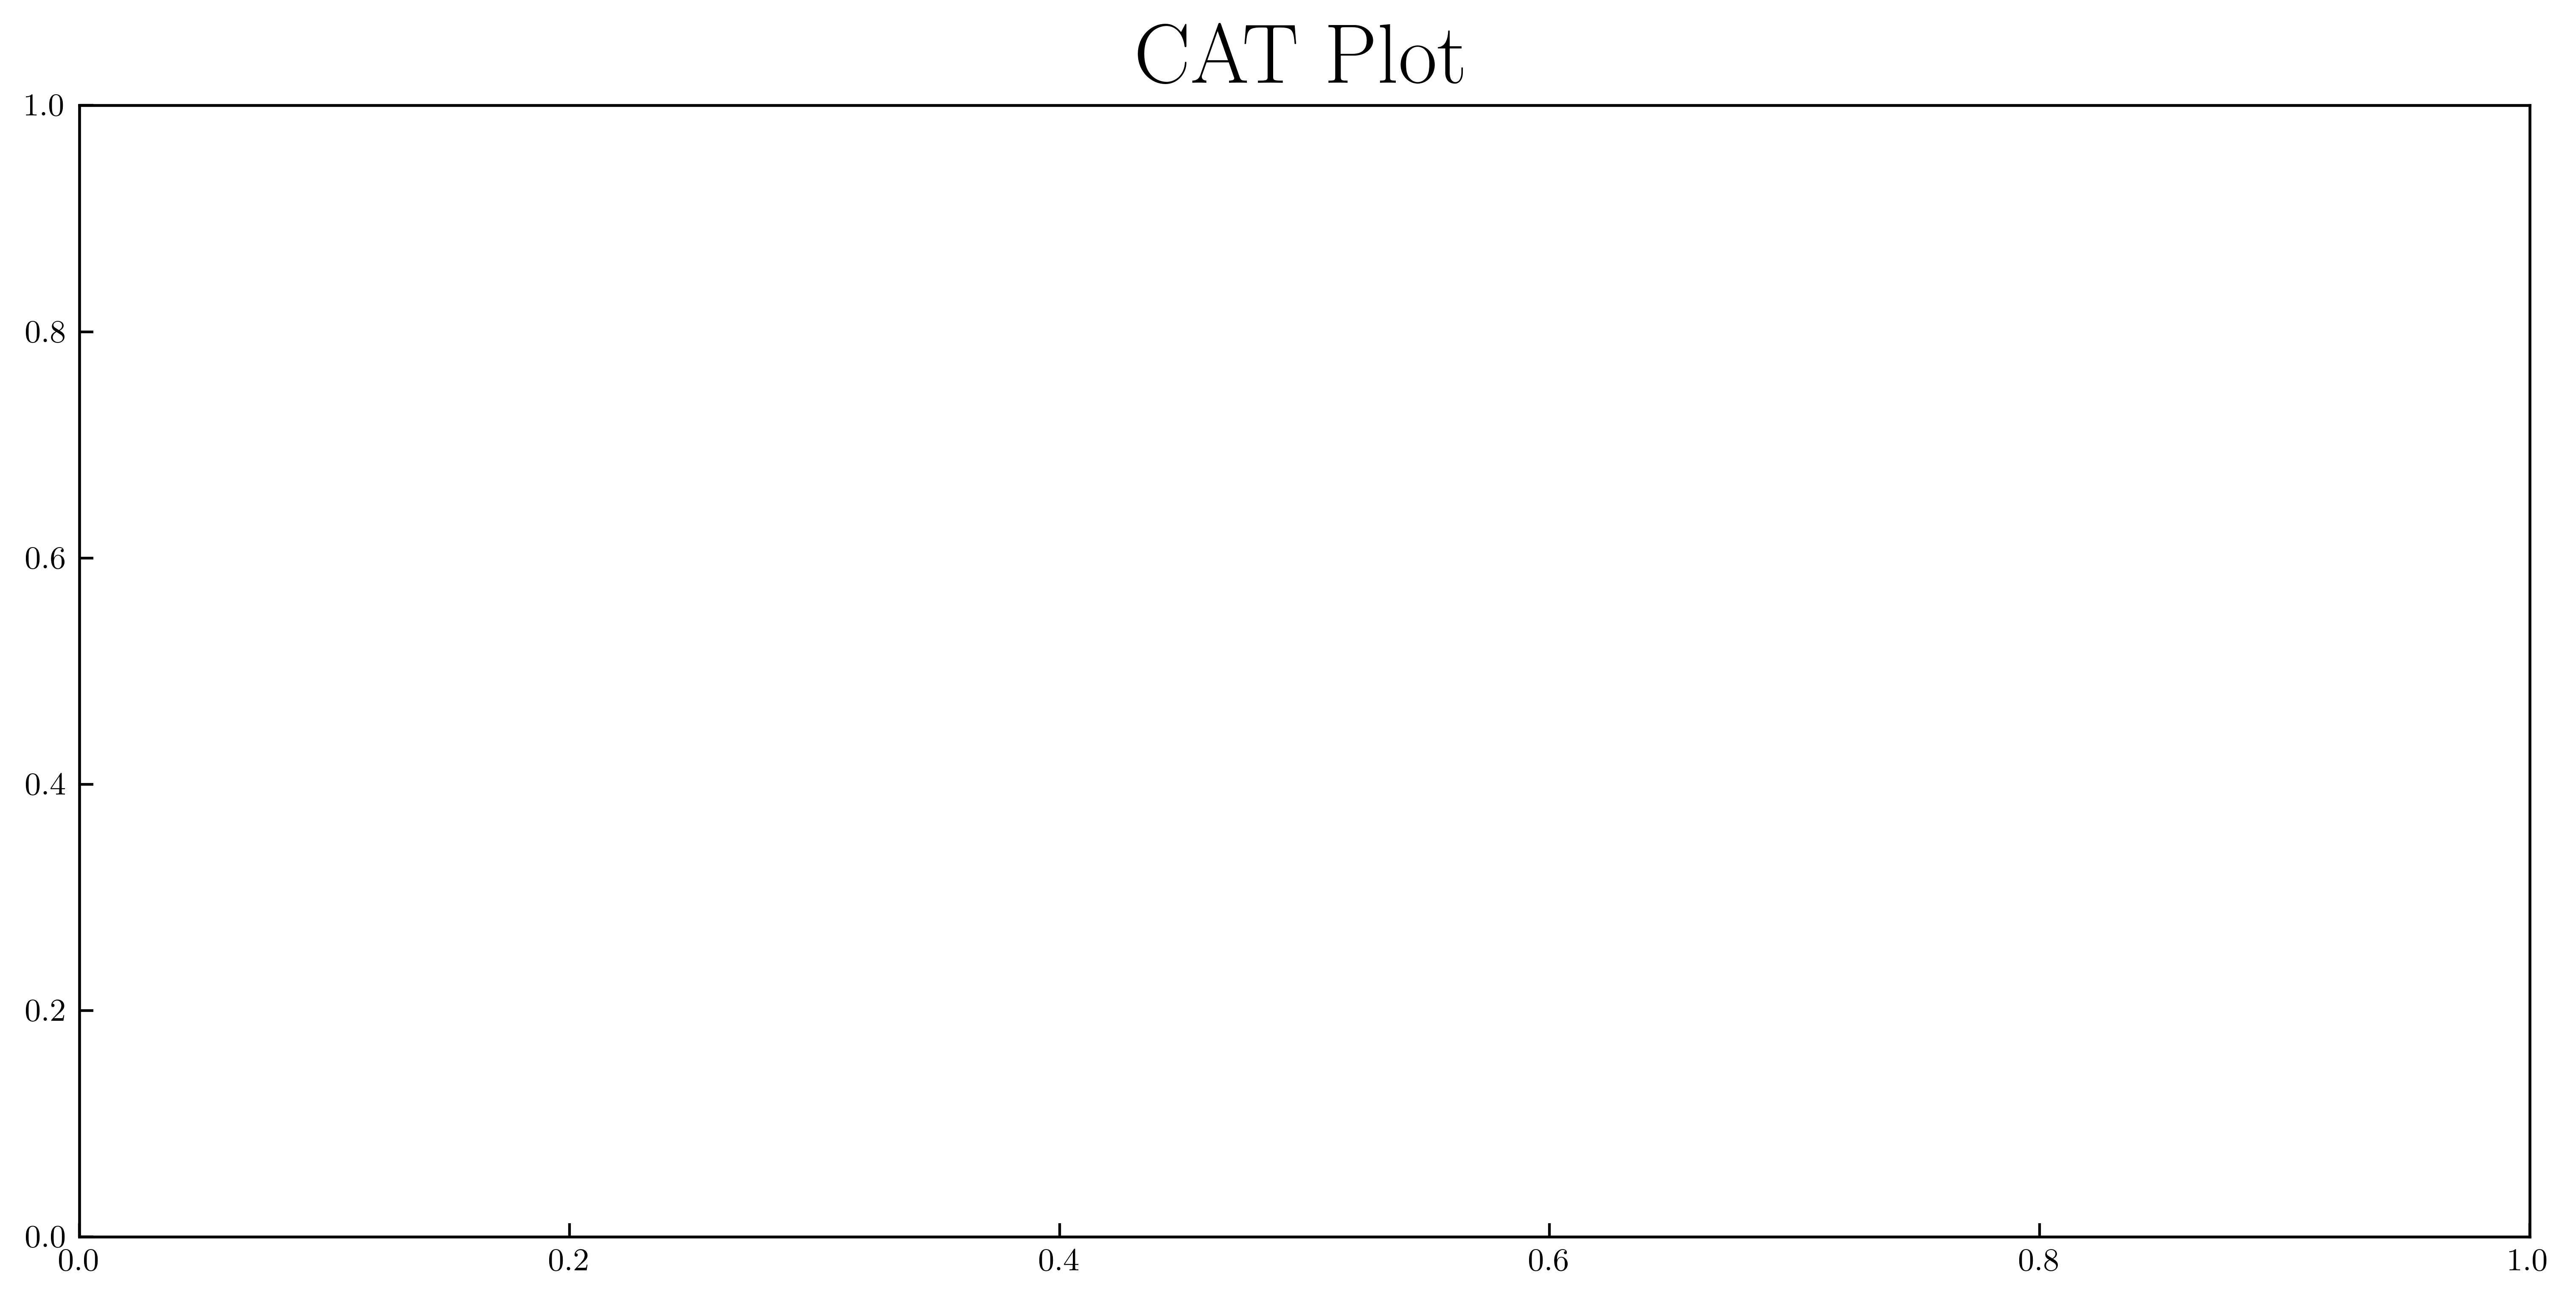

In [18]:
from matplotlib.patches import Ellipse
from matplotlib.transforms import ScaledTranslation


colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
markers = ["d", "^", "*", "o"]
sizes = [80] * 2  # [75, 25]

alpha = 0.8

SLM_timings = []
SLM_accuracy = []


fig, ax = plt.subplots(1, 1, dpi=600, figsize=(10, 5))
ax.set_title("CAT Plot", fontsize=24)

for i, eos in enumerate(files_to_check):
    eos_name = eos_names[i]
    for j, solver in enumerate(solvers):
        SLM_error = errors[f"{eos_name} {solver} SLM mass"]
        
        SLM_timings.append(SLM_runtimes[solver][i])
        SLM_accuracy.append(errors[f"{eos_name} {solver} SLM mass"])
        
        if (solver != "exact"):
            HF_error = errors[f"{eos_name} {solver} HF mass"]
            
            ax.scatter(HF_runtimes[solver][i], 
                       HF_error, 
                       marker=markers[j],
                       color=colors[i],
                       s=sizes[0], 
                       alpha=alpha,
                       # label=f"{eos_name} {solver.capitalize() if solver == "euler" else solver.upper()}"
                       )
            # ax.scatter(SLM_runtimes[solver][i], 
            #            SLM_error, 
            #            marker=markers[j],
            #            color=colors[i], 
            #            s=sizes[1],
            #            alpha=alpha)#, label=f"{eos_name} SLM")
        else:
            ax.scatter(SLM_runtimes[solver][i], 
                       SLM_error, 
                       marker=markers[j],
                       color=colors[i], 
                       s=sizes[1],
                       alpha=alpha, 
                       # label=f"{eos_name} SLM"
                       )
        
        if i == 0:
            if solver != "exact":
                ax.scatter(SLM_timings[-1] - 10, SLM_accuracy[-1], color="grey", marker=markers[j], label=f"{solver.capitalize() if solver == "euler" else solver.upper()}")
            else:
                ax.scatter(SLM_timings[-1] - 10, SLM_accuracy[-1], color="white", marker=markers[j], label=f" ")
    print(eos_name)
    ax.scatter(SLM_timings[-1] - 10, SLM_accuracy[-1], color=colors[i], marker="s", label=f"{eos_name}")
# ax.scatter(SLM_timings[-1] - 10, SLM_accuracy[-1], color=colors[0], marker="s", label=f"Exact")
#

ax.annotate("Exact", (np.mean(HF_runtimes["exact"]) - 14, 3.0 * 1e-1), fontsize=16)
ax.axvline(np.mean(HF_runtimes["exact"]),
           alpha=alpha, color="black", linewidth=3)#, label=f"{eos_name} {solver.capitalize()}")



ax.annotate("SLM Results", (3.0 * 1e-3, 1.8 * 1e-1), fontsize=16)
# Ellipse centre coordinates
x, y = (np.mean(SLM_timings), np.mean(SLM_accuracy))
# x -= 0 * 1e-4
y -= 0.083
# use the axis scale tform to figure out how far to translate 
ell_offset = ScaledTranslation(x, y, ax.transScale)
# construct the composite tform
ell_tform = ell_offset + ax.transLimits + ax.transAxes
ellipse_1 = Ellipse((x, y), 0.42, 4.7,  color="grey", fill=True, alpha=0.3, linewidth=2, transform=ell_tform)
ellipse_2 = Ellipse((x, y), 0.42, 4.7,  color="black", fill=False, alpha=0.9, linewidth=2, transform=ell_tform)
ax.add_patch(ellipse_1)
ax.add_patch(ellipse_2)



ax.set_xlabel("Time [Seconds]",               fontsize=16)
ax.set_ylabel("Relative Error in Max Mass [---]", fontsize=16)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1])

handles, labels = plt.gca().get_legend_handles_labels()
# order = [4, 5, 6, 7, 8, 0, 1, 2, 3]  # label EOSs first, then solvers
# order = [4, 0, 5, 1, 6, 2, 7, 3, 8]
order = [0, 4, 1, 5, 2, 6, 3, 7, 0, 8]
ax.legend([handles[i] for i in order], [labels[i] for i in order], 
          loc="lower center", ncols=5, framealpha=0., fontsize=11, bbox_to_anchor=(0.5, -0.025))
plt.tight_layout()
plt.savefig("./../Plots/CAT-rad.pdf")
plt.show()


In [ ]:
from matplotlib.patches import Ellipse
from matplotlib.transforms import ScaledTranslation


colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
markers = ["d", "^", "*", "o"]
sizes = [80] * 2  # [75, 25]

alpha = 0.8

SLM_timings = []
SLM_accuracy = []


fig, ax = plt.subplots(1, 1, dpi=600, figsize=(10, 5))
ax.set_title("CAT Plot", fontsize=24)

for i, eos in enumerate(files_to_check):
    eos_name = eos_names[i]
    for j, solver in enumerate(solvers):
        SLM_error = errors[f"{eos_name} {solver} SLM rad"]
        
        SLM_timings.append(SLM_runtimes[solver][i])
        SLM_accuracy.append(errors[f"{eos_name} {solver} SLM rad"])
        
        if (solver != "exact"):
            HF_error = errors[f"{eos_name} {solver} HF rad"]
            
            ax.scatter(HF_runtimes[solver][i], 
                       HF_error, 
                       marker=markers[j],
                       color=colors[i],
                       s=sizes[0], 
                       alpha=alpha,
                       # label=f"{eos_name} {solver.capitalize() if solver == "euler" else solver.upper()}"
                       )
            # ax.scatter(SLM_runtimes[solver][i], 
            #            SLM_error, 
            #            marker=markers[j],
            #            color=colors[i], 
            #            s=sizes[1],
            #            alpha=alpha)#, label=f"{eos_name} SLM")
        else:
            ax.scatter(SLM_runtimes[solver][i], 
                       SLM_error, 
                       marker=markers[j],
                       color=colors[i], 
                       s=sizes[1],
                       alpha=alpha, 
                       # label=f"{eos_name} SLM"
                       )
        
        if i == 0:
            if solver != "exact":
                ax.scatter(SLM_timings[-1] - 10, SLM_accuracy[-1], color="grey", marker=markers[j], label=f"{solver.capitalize() if solver == "euler" else solver.upper()}")
            else:
                ax.scatter(SLM_timings[-1] - 10, SLM_accuracy[-1], color="white", marker=markers[j], label=f" ")
    print(eos_name)
    ax.scatter(SLM_timings[-1] - 10, SLM_accuracy[-1], color=colors[i], marker="s", label=f"{eos_name}")
# ax.scatter(SLM_timings[-1] - 10, SLM_accuracy[-1], color=colors[0], marker="s", label=f"Exact")
#

ax.annotate("Exact", (np.mean(HF_runtimes["exact"]) - 14, 3.0 * 1e-1), fontsize=16)
ax.axvline(np.mean(HF_runtimes["exact"]),
           alpha=alpha, color="black", linewidth=3)#, label=f"{eos_name} {solver.capitalize()}")



ax.annotate("SLM Results", (3.1 * 1e-3, 1.9 * 1e-1), fontsize=16)
# Ellipse centre coordinates
x, y = (np.mean(SLM_timings), np.mean(SLM_accuracy))
x -= 1 * 1e-4
y -= 0.048
# use the axis scale tform to figure out how far to translate 
ell_offset = ScaledTranslation(x, y, ax.transScale)
# construct the composite tform
ell_tform = ell_offset + ax.transLimits + ax.transAxes
ellipse_1 = Ellipse((x, y), 0.42, 3.1,  color="grey", fill=True, alpha=0.3, linewidth=2, transform=ell_tform)
ellipse_2 = Ellipse((x, y), 0.42, 3.1,  color="black", fill=False, alpha=0.9, linewidth=2, transform=ell_tform)
ax.add_patch(ellipse_1)
ax.add_patch(ellipse_2)



ax.set_xlabel("Time [Seconds]",                     fontsize=16)
ax.set_ylabel("Relative Error in Max Radius [---]", fontsize=16)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1])

handles, labels = plt.gca().get_legend_handles_labels()
# order = [4, 5, 6, 7, 8, 0, 1, 2, 3]  # label EOSs first, then solvers
# order = [4, 0, 5, 1, 6, 2, 7, 3, 8]
order = [0, 4, 1, 5, 2, 6, 3, 7, 0, 8]
ax.legend([handles[i] for i in order], [labels[i] for i in order], 
          loc="lower center", ncols=5, framealpha=0., fontsize=11, bbox_to_anchor=(0.5, -0.025))

plt.tight_layout()
plt.savefig("./../Plots/CAT-mass.pdf")
plt.show()


In [ ]:
np.mean(list(HF_runtimes.values())) / np.mean(list(SLM_runtimes.values()))